In [9]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tensorflow"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action='ignore')

import tensorflow as tf

In [10]:
tf.__version__

'2.13.0'

In [11]:
X = np.arange(1, 6)
y = 3 * X + 2

# 모델 만들기
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 컴파일
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

# model.compile(optimizer='sgd', loss='mse',
#               metrics=['mse', 'mae'])

# 매개변수를 인스턴스나 함수 또는 변수로 설정 - 자료형을 넣지 않음.
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics = [tf.keras.losses.MeanSquaredError(),
                         tf.keras.losses.MeanAbsoluteError()])


In [14]:
# 훈련
# verbose=0 을 추가하면 훈련 과정의 내용이 출력되지 않는다.
history = model.fit(X, y, epochs=2000, verbose=0)

loss
mean_squared_error
mean_absolute_error


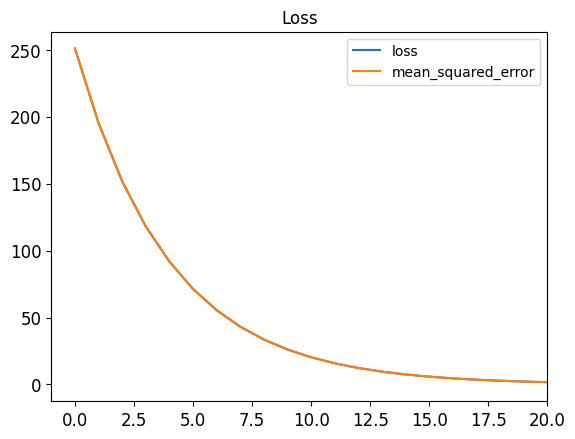

In [26]:
for key in history.history:
    print(key)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

In [27]:
model.evaluate(X, y)

1/1 [==============================] - 1s 984ms/step - loss: 1.2436e-04 - mean_squared_error: 1.2436e-04 - mean_absolute_error: 0.0096


[0.0001243625592906028, 0.0001243625592906028, 0.009571838192641735]

In [28]:
model.predict([10])

1/1 [==============================] - 0s 217ms/step


array([[32.04626]], dtype=float32)